# 背景

この章では、距離の二乗に比例する力でひかれ合う2つの物体の運動をシミュレートする。

例えば、万有引力でひかれ合う地球と月の運動などがその例である。

簡単のため、2物体は常に1つの平面上を運動するとする。

2物体質量を$m_1, m_2$の位置を$(x_1,y_1), (x_2,y_2)$、

速度を$(v^x_1,v^y_1), (v^x_2,v^y_2)$とする。

位置に関する微分方程式は
$$
\frac{\mathrm{d}x_i}{\mathrm{d}t} = v^x_i \\
\frac{\mathrm{d}y_i}{\mathrm{d}t} = v^y_i
$$
ここで$i \in [1,2]$ である。

物体1にかかる力$F_1$は、比例定数を$G$として、
$$
F^x_1 = G \frac {x_2 - x_1}{r^3} \\
F^y_1 = G \frac {y_2 - y_1}{r^3}
$$
である。なお、$r = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$ である。
速度に関する微分方程式は
$$
\frac{\mathrm{d}v^x_i}{\mathrm{d}t} = \frac{F^x_i}{m_i} \\
\frac{\mathrm{d}v^y_i}{\mathrm{d}t} = \frac{F^y_i}{m_i}
$$
と表せる。

# 数値計算

まずライブラリを導入する。

In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

位置・速度に関する微分を差分法で近似する。

つまり、
$$
x(t+\Delta t) = x(t) + \frac{\mathrm{d}x}{\mathrm{d}t}\Delta t = x(t) + v(t)\Delta t
$$
$$
v(t+\Delta t) = v(t) + \frac{\mathrm{d}v}{\mathrm{d}t}\Delta t = v(t) + \frac{F(t)}{m} \Delta t 
$$

まず、$(x_1, y_1), (x_2, y_2), G$ が与えられた時の力$(F^x_1, F^y_1)$を返す関数を作る。

なお、$F^x_2 = -F^x_1, F^y_2 = -F^y_1$である。

In [34]:
def get_F1(x1, y1, x2, y2, G):
    # 距離
    r = np.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1))
    # 力
    F1x = G*(x2-x1)/(r**3.)
    F1y = G*(y2-y1)/(r**3.)
    
    return F1x, F1y

時刻$t$のときの$x, v$ から時刻$t+\Delta t$での$x$を返す関数を作る。

In [35]:
def get_x(x, v, delta_t):
    return x + v*delta_t    

時刻$t$のときの$v, F$ から時刻$t+\Delta t$での$v$を返す関数を作る。

In [36]:
def get_v(v, F, m, delta_t):
    return v + F/m * delta_t

# 各種パラメータの定義

$G, m_1, m_2$ を定義する

In [37]:
G = 1.
m1= 1.
m2= 0.5

$t=0$での$(x_1,y_1),(x_2,y_2), (v^x_1,v^y_1),(v^x_2,v^y_2)$ をそれぞれ与える（初期値）。

なお最も単純な解は、原点を中心として

物体1が半径$r_1$, 物体2が半径$r_2$ が角運動量$\omega$ 

で回転するものである。なお、遠心力と重力が釣り合うため
$$
m_1 r_1 \omega^2 = \frac{G}{(r_1+r_2)^2} \\
m_2 r_2 \omega^2 = \frac{G}{(r_1+r_2)^2} \\
$$
を満たす。

r_1 = 1 とすると、$r_2 = r_1 \frac{m_1}{m_2}$、$\omega = \sqrt{\frac{G}{m_1 r_1 (r_1+r_2)^2}}$
である。

In [38]:
r1 = 1.

x1_t = r1
y1_t = 0.
x2_t = - r1 * m1 / m2
y2_t = 0.

omega = np.sqrt(G/(m1 * r1 * (x1_t-x2_t)**2.))

vx1_t = 0.
vy1_t = omega/x1_t
vx2_t = 0.
vy2_t = omega/x2_t

$\Delta t$の値、計算回数$N$を与える

In [39]:
delta_t = 0.001
N = 10000

# 繰り返し計算によるシミュレーション

値を格納するアレイを用意する

In [40]:
x1_list = []
y1_list = []
x2_list = []
y2_list = []

vx1_list = []
vy1_list = []
vx2_list = []
vy2_list = []

forループにより繰り返し計算を行う。

In [41]:
for i in range(N):
    # 現在位置から力を計算する。
    F1x, F1y = get_F1(x1_t, y1_t, x2_t, y2_t, G)
    # 時刻tでの x,vxから t+ dt でのxを計算する。
    x1_t_dt = get_x(x1_t, vx1_t, delta_t)
    y1_t_dt = get_x(y1_t, vy1_t, delta_t)
    x2_t_dt = get_x(x2_t, vx2_t, delta_t)
    y2_t_dt = get_x(y2_t, vy2_t, delta_t)
    
    # 時刻tでのF, vから t+ dt でのvを計算する。
    vx1_t_dt = get_v(vx1_t, F1x, m1, delta_t)
    vy1_t_dt = get_v(vy1_t, F1y, m1, delta_t)
    vx2_t_dt = get_v(vx2_t, -F1x, m2, delta_t)
    vy2_t_dt = get_v(vy2_t, -F1y, m2, delta_t)
    
    # t + dt での値をリストに格納する。
    x1_list.append(x1_t_dt)
    y1_list.append(y1_t_dt)
    x2_list.append(x2_t_dt)
    y2_list.append(y2_t_dt)
    
    vx1_list.append(vx1_t_dt)
    vy1_list.append(vy1_t_dt)
    vx2_list.append(vx2_t_dt)
    vy2_list.append(vy2_t_dt)
    
    # 時刻tをdtに更新する。実際は、x1_tにx1_t_dtを代入するなどする
    x1_t = x1_t_dt
    y1_t = y1_t_dt
    x2_t = x2_t_dt
    y2_t = y2_t_dt

    vx1_t = vx1_t_dt
    vy1_t = vy1_t_dt
    vx2_t = vx2_t_dt
    vy2_t = vy2_t_dt

# グラフを描画する。

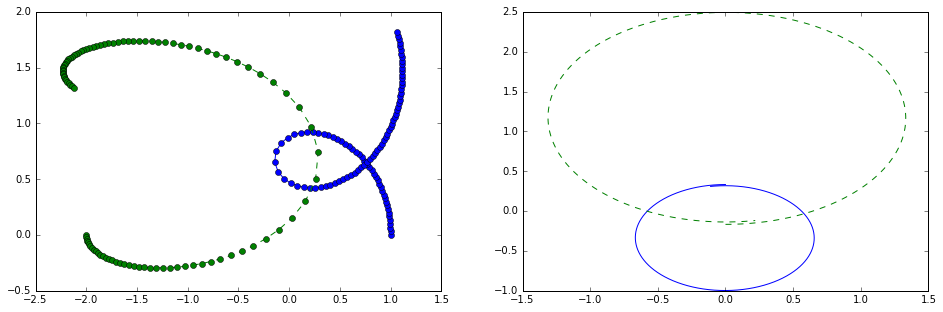

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(x1_list[::100], y1_list[::100], '-o')
plt.plot(x2_list[::100], y2_list[::100], '--o')
plt.subplot(1,2,2)
plt.plot(vx1_list, vy1_list, '-')
plt.plot(vx2_list, vy2_list, '--')